<a href="https://colab.research.google.com/github/AishaniD078/huds_ms_airband_analysis_2_repo/blob/main/HUDS_Research_Skeleton_Notebook_Aishani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis on the Impact of Broadband Availability in Underserved Regions

# Research Question

#### How does the availability of both fixed and mobile broadband technologies affect broadband speeds in underserved regions of the U.S.?

#### This question is:

* Specific: Focuses specifically on the effect of the availibilty of broadband technologies.

* Researchable: There is information on the broadband in different areas as well as the speeds. This gives us information on how the regions correlate to the speeds of broadband in those regions.

* Feasible: This is a simple question based on social justice while also connecting with the information provided for the fixed and mobile broadbands.

* Interesting: This is interesting to us because it is important to think about how accesibilty impacts how well broadband technology in undeserving areas.


# Problem Statement

Different areas have different access to high speed data which causes the speeds of broadbands to be worse. Certain areas may have this because of distance from cell towers and lower population density. This causes broadband services to not be provided to these areas as well as others, causing internet speeds to be slower. Overall, the availability of fixed and mobile broadband cause network speeds to be worse, especially in underserved regions.

### Import libraries

In [ ]:
# Import the libraries
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
%matplotlib inline
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization
import zipfile
import os

# Let's make sure pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
# pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Extract the zip files and rename the datasets

In [ ]:
zip_paths = [
    '/content/bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.zip',
    '/content/bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.zip',
    '/content/bdc_us_provider_summary_by_geography_D24_10jun2025.zip'
]

for zip_path in zip_paths:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        print(f"Contents of {zip_path.split('/')[-1]}:")
        print(zip_ref.namelist())
        print()

extract_dir = '/content'

# Each tuple: (zip file path, original filename inside zip, new desired filename)
files_info = [
    (
        '/content/bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.zip',
        'bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.csv',
        'fixed_broadband.csv'  # new name for fixed
    ),
    (
        '/content/bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.zip',
        'bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.csv',
        'mobile_broadband.csv'  # new name for mobile
    ),
    (   '/content/bdc_us_provider_summary_by_geography_D24_10jun2025.zip',
        'bdc_us_provider_summary_by_geography_D24_10jun2025.csv',
        'provider_summary.csv' # new name for provider
    )
]

for zip_path, old_filename, new_filename in files_info:
    # Extract files
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    # Rename the extracted file
    old_path = os.path.join(extract_dir, old_filename)
    new_path = os.path.join(extract_dir, new_filename)
    os.rename(old_path, new_path)


Contents of bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.zip:
['bdc_us_fixed_broadband_summary_by_geography_D24_10jun2025.csv']

Contents of bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.zip:
['bdc_us_mobile_broadband_summary_by_geography_D24_10jun2025.csv']

Contents of bdc_us_provider_summary_by_geography_D24_10jun2025.zip:
['bdc_us_provider_summary_by_geography_D24_10jun2025.csv']



### Read the datasets

In [ ]:
# Read the dataset
fixed_bb = pd.read_csv('fixed_broadband.csv')
mobile_bb = pd.read_csv('mobile_broadband.csv')
provider_summary = pd.read_csv('provider_summary.csv')

#### Understand the Dataset

Let's check first elements of each dataframe with the ```.head()``` method.

We will check the first 7 rows by inputting 7 in the parentheses.

In [ ]:
# Display the first ten rows of the fixed broadband
print("Fixed Broadband Data (first 7 rows):")
fixed_bb.head(7)

Fixed Broadband Data (first 7 rows):


,area_data_type,geography_type,geography_id,geography_desc,geography_desc_full,total_units,biz_res,technology,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100
0,Total,National,99,National,National,164620769,R,Any Technology,1.000000,1.000000,1.000000,0.999915,0.913689,0.591365
1,Total,National,99,National,National,164620769,B,Any Technology,1.000000,1.000000,1.000000,0.993139,0.746884,0.501676
2,Total,National,99,National,National,164620769,R,All Wired,0.942141,0.931779,0.918651,0.908110,0.898847,0.583388
3,Total,National,99,National,National,164620769,B,All Wired,0.829826,0.801551,0.775540,0.728392,0.712035,0.484683
4,Total,National,99,National,National,164620769,R,Any Terrestrial,0.978991,0.971951,0.964834,0.945304,0.913689,0.591365
5,Total,National,99,National,National,164620769,B,Any Terrestrial,0.956926,0.924305,0.912836,0.828726,0.746884,0.501676
6,Total,National,99,National,National,164620769,R,All Wired and Licensed Fixed Wireless,0.973188,0.964228,0.955688,0.937545,0.907792,0.584845


In [ ]:
# Display the first ten rows of the mobile broadband
print("Mobile Broadband Data (first 7 rows):")
mobile_bb.head(7)

Mobile Broadband Data (first 7 rows):


,area_data_type,geography_type,geography_id,geography_desc,total_area,mobilebb_3g_area_st_pct,mobilebb_3g_area_iv_pct,mobilebb_4g_area_st_pct,mobilebb_4g_area_iv_pct,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd1_area_iv_pct,mobilebb_5g_spd2_area_st_pct,mobilebb_5g_spd2_area_iv_pct
0,Total,National,99,National,9.754824e+06,0.061412,0.042772,0.687893,0.458448,0.480004,0.248525,0.371785,0.170598
1,Total,State,01,Alabama,1.370274e+05,0.000000,0.000000,0.946387,0.636515,0.619221,0.301340,0.453410,0.225019
2,Total,State,02,Alaska,1.846753e+06,0.081332,0.053745,0.074291,0.031995,0.017289,0.006168,0.008915,0.003235
3,Total,State,04,Arizona,2.573078e+05,0.070936,0.047557,0.725504,0.338257,0.390342,0.173772,0.311632,0.117986
4,Total,State,05,Arkansas,1.310934e+05,0.000000,0.000000,0.909323,0.522770,0.652989,0.312045,0.464339,0.220165
5,Total,State,06,California,3.975136e+05,0.005523,0.004135,0.709680,0.467043,0.541369,0.308786,0.455683,0.209598
6,Total,State,08,Colorado,2.471289e+05,0.341883,0.253794,0.759425,0.483074,0.426032,0.163101,0.321541,0.110950


In [ ]:
# Display the first ten rows of the provider summary
print("Provider Summary Data (first 7 rows):")
provider_summary.head(7)

Provider Summary Data (first 7 rows):


,geography_type,geography_id,geography_desc,data_type,provider_id,res_st_pct,bus_iv_pct
0,CBSA (MSA),10100,"Aberdeen, SD Micro Area",Fixed Broadband,130077,0.0000,0.1291
1,CBSA (MSA),10100,"Aberdeen, SD Micro Area",Fixed Broadband,130228,0.5622,0.5622
2,CBSA (MSA),10100,"Aberdeen, SD Micro Area",Fixed Broadband,130403,0.1278,0.1475
3,CBSA (MSA),10100,"Aberdeen, SD Micro Area",Fixed Broadband,130405,0.0042,0.0042
4,CBSA (MSA),10100,"Aberdeen, SD Micro Area",Fixed Broadband,130627,1.0000,1.0000
5,CBSA (MSA),10100,"Aberdeen, SD Micro Area",Fixed Broadband,130673,0.8173,0.8163
6,CBSA (MSA),10100,"Aberdeen, SD Micro Area",Fixed Broadband,130821,0.7573,0.7573


Let's check last elements of each dataframe with the ```.tail()``` method.

We will check the last 7 rows by inputting 7 in the parentheses.

In [ ]:
# Display the last ten rows of fixed broadband
print("Fixed Broadband Data (last 7 rows):")
fixed_bb.tail(7)

Fixed Broadband Data (last 7 rows):


,area_data_type,geography_type,geography_id,geography_desc,geography_desc_full,total_units,biz_res,technology,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100
623933,Rural,CBSA (MSA),49820,"Zapata, TX","Zapata, TX",2642,B,All Fixed Wireless,0.761923,0.721423,0.718395,0.174868,0.056018,0.0
623934,Rural,CBSA (MSA),49820,"Zapata, TX","Zapata, TX",2642,R,Unlicensed Fixed Wireless,0.434519,0.434519,0.434519,0.003407,0.002650,0.0
623935,Rural,CBSA (MSA),49820,"Zapata, TX","Zapata, TX",2642,B,Unlicensed Fixed Wireless,0.434519,0.434519,0.434519,0.003407,0.002650,0.0
623936,Rural,CBSA (MSA),49820,"Zapata, TX","Zapata, TX",2642,R,Licensed Fixed Wireless,0.478047,0.366768,0.366768,0.149129,0.053369,0.0
623937,Rural,CBSA (MSA),49820,"Zapata, TX","Zapata, TX",2642,B,Licensed Fixed Wireless,0.701741,0.543149,0.540121,0.171461,0.053369,0.0
623938,Rural,CBSA (MSA),49820,"Zapata, TX","Zapata, TX",2642,R,Other,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
623939,Rural,CBSA (MSA),49820,"Zapata, TX","Zapata, TX",2642,B,Other,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
# Display the last ten rows of mobile broadband
print("Mobile Broadband Data (last 7 rows):")
mobile_bb.tail(7)

Mobile Broadband Data (last 7 rows):


,area_data_type,geography_type,geography_id,geography_desc,total_area,mobilebb_3g_area_st_pct,mobilebb_3g_area_iv_pct,mobilebb_4g_area_st_pct,mobilebb_4g_area_iv_pct,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd1_area_iv_pct,mobilebb_5g_spd2_area_st_pct,mobilebb_5g_spd2_area_iv_pct
21011,Nontribal,CBSA (MSA),49500,"Yauco, PR",1007.821360,0.60786,0.225543,0.653846,0.459762,0.635556,0.496237,0.481605,0.209762
21012,Nontribal,CBSA (MSA),49620,"York-Hanover, PA",2375.879870,0.00000,0.000000,0.999645,0.909647,0.982710,0.898652,0.959434,0.830865
21013,Nontribal,CBSA (MSA),49660,"Youngstown-Warren-Boardman, OH-PA",4448.086143,0.00000,0.000000,0.993606,0.828862,0.946861,0.746904,0.878377,0.672595
21014,Nontribal,CBSA (MSA),49700,"Yuba City, CA",3146.808437,0.00000,0.000000,0.941423,0.799732,0.883983,0.636619,0.755950,0.375197
21015,Nontribal,CBSA (MSA),49740,"Yuma, AZ",12342.230355,0.00000,0.000000,0.610835,0.287837,0.379871,0.153131,0.281112,0.095678
21016,Nontribal,CBSA (MSA),49780,"Zanesville, OH",1760.843402,0.00000,0.000000,0.936233,0.637255,0.760304,0.433870,0.592750,0.342884
21017,Nontribal,CBSA (MSA),49820,"Zapata, TX",2352.074725,0.00000,0.000000,0.996238,0.431661,0.692745,0.175907,0.456337,0.116704


In [ ]:
# Display the last ten rows of provider summary
print("Provider Summary Data (last 7 rows):")
provider_summary.tail(7)

Provider Summary Data (last 7 rows):


,geography_type,geography_id,geography_desc,data_type,provider_id,res_st_pct,bus_iv_pct
514210,Tribal,9975R,Wassamasaw SDTSA,Fixed Broadband,131425,0.3038,0.3305
514211,Tribal,9975R,Wassamasaw SDTSA,Fixed Broadband,290111,1.0000,1.0000
514212,Tribal,9975R,Wassamasaw SDTSA,Fixed Broadband,430076,1.0000,1.0000
514213,Tribal,9975R,Wassamasaw SDTSA,Mobile Broadband,130077,1.0000,0.8616
514214,Tribal,9975R,Wassamasaw SDTSA,Mobile Broadband,130403,1.0000,0.4068
514215,Tribal,9975R,Wassamasaw SDTSA,Mobile Broadband,131425,1.0000,0.7514
514216,Tribal,9975R,Wassamasaw SDTSA,Mobile Broadband,460677,0.9831,0.8588


Next let's look at the shape of each dataframe use the ```.shape()``` method:

In [ ]:
#Display the dimensions of the fixed broadband or the number of rows and columns
fixed_bb.shape

(623940, 14)

In [ ]:
#Display the dimensions of the mobile broadband or the number of rows and columns
mobile_bb.shape

(21018, 13)

In [ ]:
#Display the dimensions of the provider summary or the number of rows and columns
provider_summary.shape

(514217, 7)

Let's print:
  - The amount of rows in each dataframe.
  - The amount of columns in each dataframe.
  - The total number of datapoints in each dataframe(row x columns).

In [ ]:
# Get shape information
fixed_rows, fixed_cols = fixed_bb.shape
fixed_total = fixed_rows * fixed_cols

mobile_rows, mobile_cols = mobile_bb.shape
mobile_total = mobile_rows * mobile_cols

provider_rows, provider_cols = provider_summary.shape
provider_total = provider_rows * provider_cols

# Print the result
print(f"The `Fixed Broadband` dataframe contains {fixed_rows} rows and {fixed_cols} columns, total number is {fixed_total}.")
print(f"The `Mobile Broadband` dataframe contains {mobile_rows} rows and {mobile_cols} columns, total number is {mobile_total}")
print(f"The `Provider Summary` dataframe contains {provider_rows} rows and {provider_cols} columns, total number is {provider_total}.")

The `Fixed Broadband` dataframe contains 623940 rows and 14 columns, total number is 8735160.
The `Mobile Broadband` dataframe contains 21018 rows and 13 columns, total number is 273234
The `Provider Summary` dataframe contains 514217 rows and 7 columns, total number is 3599519.


Then we can can look at the number of missing values ```.isnull().sum().sum()```.

These methods can help display the number of null values in a consise manner.

In [ ]:
print(f"The number of missing values in Fixed Broadband Dataframe is: ", fixed_bb.isnull().sum().sum()),
print(f"The number of missing values in Mobile Broadband Dataframe is: ", mobile_bb.isnull().sum().sum()),
print(f"The number of missing values in Provider Summary Dataframe is: ", provider_summary.isnull().sum().sum())

The number of missing values in Fixed Broadband Dataframe is:  0
The number of missing values in Mobile Broadband Dataframe is:  0
The number of missing values in Provider Summary Dataframe is:  0


### Data Types


The main data types in Pandas dataframes are `object`, `float`, `int64`, `bool` and `datetime64`.

We can use the ```.info()``` method to check the data types in each dataframe.

In [ ]:
# Let's check the basic information about the fixed broadband dataset
print("Data types in Fixed Broadband Data: ")
fixed_bb.info()

Data types in Fixed Broadband Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623940 entries, 0 to 623939
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   area_data_type       623940 non-null  object 
 1   geography_type       623940 non-null  object 
 2   geography_id         623940 non-null  object 
 3   geography_desc       623940 non-null  object 
 4   geography_desc_full  623940 non-null  object 
 5   total_units          623940 non-null  int64  
 6   biz_res              623940 non-null  object 
 7   technology           623940 non-null  object 
 8   speed_02_02          623940 non-null  float64
 9   speed_10_1           623940 non-null  float64
 10  speed_25_3           623940 non-null  float64
 11  speed_100_20         623940 non-null  float64
 12  speed_250_25         623940 non-null  float64
 13  speed_1000_100       623940 non-null  float64
dtypes: float64(6), int64(1), object

In [ ]:
# Let's check the basic information about the mobile broadband dataset
print("Data types in Provider Summary Data: ")
mobile_bb.info()

Data types in Provider Summary Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21018 entries, 0 to 21017
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   area_data_type                21018 non-null  object 
 1   geography_type                21018 non-null  object 
 2   geography_id                  21018 non-null  object 
 3   geography_desc                21018 non-null  object 
 4   total_area                    21018 non-null  float64
 5   mobilebb_3g_area_st_pct       21018 non-null  float64
 6   mobilebb_3g_area_iv_pct       21018 non-null  float64
 7   mobilebb_4g_area_st_pct       21018 non-null  float64
 8   mobilebb_4g_area_iv_pct       21018 non-null  float64
 9   mobilebb_5g_spd1_area_st_pct  21018 non-null  float64
 10  mobilebb_5g_spd1_area_iv_pct  21018 non-null  float64
 11  mobilebb_5g_spd2_area_st_pct  21018 non-null  float64
 12  mobilebb_5g_spd2_area_

In [ ]:
# Let's check the basic information about the provider summary dataset
print("Data types in Provider Summary Data: ")
provider_summary.info()

Data types in Provider Summary Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514217 entries, 0 to 514216
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   geography_type  514217 non-null  object 
 1   geography_id    514217 non-null  object 
 2   geography_desc  514217 non-null  object 
 3   data_type       514217 non-null  object 
 4   provider_id     514217 non-null  int64  
 5   res_st_pct      514217 non-null  float64
 6   bus_iv_pct      514217 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 27.5+ MB


## Observations of the Data Set

Let's describe the information we found on the dataset. This includes:
* The rows and columns
* The number of non-null entries
* The amount of missing(null) values


### Fixed Broadband

- **Rows:** 623,940  
- **Columns:** 14  
- **Data Types:**  
  - 7 columns are `object`  
  - 6 columns are `float64`  
  - 1 column is `int64`  
- **Missing values:**  
  - All columns report 623,940 non-null entries, which matches the total number of rows.  
  - Therefore, no missing values are present.

### Mobile Broadband

- **Rows:** 21018
- **Columns:** 13
- **Data Types:**  
  - 4 columns are `object`  
  - 9 columns are `float64`  
- **Missing values:**  
  - All columns report 21018 non-null entries, which matches the total number of rows.  
  - Therefore, no missing values are present.

### Provider Summary

- **Rows:** 514217
- **Columns:** 7
- **Data Types:**  
  - 4 columns are `object`  
  - 2 columns are `float64`
  - 1 column is `int64`  
- **Missing values:**  
  - All columns report 514217 non-null entries, which matches the total number of rows.  
  - Therefore, no missing values are present.

# Data Cleaning:

* ### Missing Vaules:
There were no missing values found in the dataset.
* ### Redundant Values:
There are a few values in each dataframe that are not useful in answering the research question. So, our group dicussed the values and decided to create new dataframes from the fixed and movible broadbands. We also decided to not use the provider summary dataframe because it did not have any values or data that would be useful in answering our questions.

In [ ]:
# Create a new fixed broadband with only neccessary values
new_fixed_bb = fixed_bb[['area_data_type', 'speed_02_02', 'speed_10_1', 'speed_25_3', 'speed_100_20', 'speed_250_25', 'speed_1000_100']].copy()
# Look at the head of the new dataframe
new_fixed_bb.head()

,area_data_type,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100
0,Total,1.000000,1.000000,1.000000,0.999915,0.913689,0.591365
1,Total,1.000000,1.000000,1.000000,0.993139,0.746884,0.501676
2,Total,0.942141,0.931779,0.918651,0.908110,0.898847,0.583388
3,Total,0.829826,0.801551,0.775540,0.728392,0.712035,0.484683
4,Total,0.978991,0.971951,0.964834,0.945304,0.913689,0.591365


In [ ]:
# Create a new mobile broadband with only neccessary values
new_mobile_bb = mobile_bb[['area_data_type', 'mobilebb_3g_area_st_pct', 'mobilebb_3g_area_iv_pct', 'mobilebb_4g_area_st_pct', 'mobilebb_4g_area_iv_pct', 'mobilebb_5g_spd1_area_st_pct', 'mobilebb_5g_spd1_area_iv_pct', 'mobilebb_5g_spd2_area_st_pct', 'mobilebb_5g_spd2_area_iv_pct']].copy()
# Look at the head of the new dataframe
new_mobile_bb.head()

,area_data_type,mobilebb_3g_area_st_pct,mobilebb_3g_area_iv_pct,mobilebb_4g_area_st_pct,mobilebb_4g_area_iv_pct,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd1_area_iv_pct,mobilebb_5g_spd2_area_st_pct,mobilebb_5g_spd2_area_iv_pct
0,Total,0.061412,0.042772,0.687893,0.458448,0.480004,0.248525,0.371785,0.170598
1,Total,0.000000,0.000000,0.946387,0.636515,0.619221,0.301340,0.453410,0.225019
2,Total,0.081332,0.053745,0.074291,0.031995,0.017289,0.006168,0.008915,0.003235
3,Total,0.070936,0.047557,0.725504,0.338257,0.390342,0.173772,0.311632,0.117986
4,Total,0.000000,0.000000,0.909323,0.522770,0.652989,0.312045,0.464339,0.220165


### New feature in the dataframes
In our research question, we used the word "underserved". Our group dicussed how to define such underserved areas and came to the conclusion that we should classify regions by broadband speeds. Regions with broadband speeds less than 50% are classified as underserved, while those with speeds above 50% are classfied as served.

#### Fixed Broadband

We chose to use a for loop to check which regions(found in the area_data_type column) were underserved and served. We chose to use the column speed_25_3 because it seemed like an average between the two extremes(speed_02_02 and speed_1000_100). We used this column to determine the region status(underserved and served).

In [ ]:
# Mapping new feature to new_fixed_bb
fixed_broadband_status = []

for index, row in new_fixed_bb.iterrows():
    # Check if the percentage of broadband speeds is less than 50%
    if row['speed_25_3'] < 0.50 :
        fixed_broadband_status.append('Underserved')
    else:
        fixed_broadband_status.append('Served')

# Add the new 'region_status' column to new_fixed_bb
new_fixed_bb['region_status'] = fixed_broadband_status

In [ ]:
#Let's take a look at the new feature within the fixed broadband dataframe
new_fixed_bb.head()

,area_data_type,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100,region_status
0,Total,1.000000,1.000000,1.000000,0.999915,0.913689,0.591365,Served
1,Total,1.000000,1.000000,1.000000,0.993139,0.746884,0.501676,Served
2,Total,0.942141,0.931779,0.918651,0.908110,0.898847,0.583388,Served
3,Total,0.829826,0.801551,0.775540,0.728392,0.712035,0.484683,Served
4,Total,0.978991,0.971951,0.964834,0.945304,0.913689,0.591365,Served


In [ ]:
# Let's compare the served to underserved regions in the fixed broadband
new_fixed_bb['region_status'].value_counts()

,count
region_status,
Served,402545
Underserved,221395


#### Mobile Broadband
We chose to do the same process for the mobile broadband as the fixed broadband. We chose to use the column mobilebb_4g_area_st_pct because it seemed like an average between the two extremes(mobilebb_3g_area_st_pct and mobilebb_5g_spd2_area_iv_pct ). We used this column to determine the region status(underserved and served).

In [ ]:
# Mapping new feature to new_mobile_bb
mobile_broadband_status = []

for index, row in new_mobile_bb.iterrows():
    # Check if the percentage of mobile broadband coverage is less than 50%
    if row['mobilebb_4g_area_st_pct'] < 0.50:
        mobile_broadband_status.append('Underserved')
    else:
        mobile_broadband_status.append('Served')

# Add the new 'region_status' column to new_mobile_bb
new_mobile_bb['region_status'] = mobile_broadband_status

In [ ]:
#Let's take a look at the new feature within the mobile broadband dataframe
new_mobile_bb.head()

,area_data_type,mobilebb_3g_area_st_pct,mobilebb_3g_area_iv_pct,mobilebb_4g_area_st_pct,mobilebb_4g_area_iv_pct,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd1_area_iv_pct,mobilebb_5g_spd2_area_st_pct,mobilebb_5g_spd2_area_iv_pct,region_status
0,Total,0.061412,0.042772,0.687893,0.458448,0.480004,0.248525,0.371785,0.170598,Served
1,Total,0.000000,0.000000,0.946387,0.636515,0.619221,0.301340,0.453410,0.225019,Served
2,Total,0.081332,0.053745,0.074291,0.031995,0.017289,0.006168,0.008915,0.003235,Underserved
3,Total,0.070936,0.047557,0.725504,0.338257,0.390342,0.173772,0.311632,0.117986,Served
4,Total,0.000000,0.000000,0.909323,0.522770,0.652989,0.312045,0.464339,0.220165,Served


In [ ]:
# Let's compare the served to underserved regions for the mobile broadband
new_mobile_bb['region_status'].value_counts()

,count
region_status,
Served,19863
Underserved,1155


### Summary Statistics

Now that we have our new dataframes, we can take a look at the details of each dataframe using the ```.describe()``` method.

In [ ]:
# Let's take a look at the different statistics of the fixed broadband dataframe
new_fixed_bb.describe()

,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100
count,623940.000000,623940.000000,623940.000000,623940.000000,623940.000000,623940.000000
mean,0.682724,0.650933,0.630012,0.507730,0.299657,0.180103
std,0.378161,0.384968,0.395467,0.421444,0.381699,0.291874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.386914,0.303987,0.229282,0.000945,0.000000,0.000000
50%,0.886152,0.835642,0.806306,0.527915,0.000167,0.000000
75%,1.000000,1.000000,1.000000,0.985898,0.673684,0.305059
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Fixed Broadband Statistics
The ```'speed_02_02', 'speed_10_1', 'speed_25_3',``` and ```speed_100_20'``` columns have a regular distribution because their means and medians(50%) are very close by. The last two columns have means and medians farther apart, however the means are the not more or less than 1 std than the medians. This indicates a regular distribution for these two columns as well. The mins and maxs are close to the first(25%) and third quartile(75%) respectively, meaning than no outliers are not present.

In [ ]:
# Let's take a look at the different statistics of the mobile broadband dataframe
new_mobile_bb.describe()

,mobilebb_3g_area_st_pct,mobilebb_3g_area_iv_pct,mobilebb_4g_area_st_pct,mobilebb_4g_area_iv_pct,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd1_area_iv_pct,mobilebb_5g_spd2_area_st_pct,mobilebb_5g_spd2_area_iv_pct
count,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000
mean,0.053035,0.039227,0.896380,0.699465,0.736536,0.496170,0.620710,0.384792
std,0.194349,0.157577,0.204381,0.269683,0.280536,0.322464,0.301191,0.312329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.902591,0.519793,0.570093,0.223778,0.395141,0.127029
50%,0.000000,0.000000,0.989849,0.741811,0.826214,0.444444,0.641574,0.286158
75%,0.000000,0.000000,1.000000,0.955017,0.987752,0.792229,0.916737,0.614376
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Mobile Broadband Statistics
The columns in this dataframe have means and medians(50%) very close to each other, indicating a normal distribution for each column. The mins for the ```'mobile_4g_area_st_pct', 'mobilebb_4g_area_iv_pct', 'mobilebb_5g_spd1_area_st_pct'``` and ```'mobilebb_5g_spd2_area_st_pct'``` are far from the first quartile(25%) which means there are lower outliers. Also the maxs of ```'mobilebb_3g_area_st_pct',	'mobilebb_3g_area_iv_pct, 'mobilebb_5g_spd1_area_iv_pct',``` and ```'mobilebb_5g_spd2_area_iv_pct'``` are far apart from the  third quartile(75%) which means those columns have higher outliers.

### Correlation Matrix
Let's create correlation matrices to see the connection between the different column values.

In [ ]:
#Create a correlation matrix for the fixed broadband dataframe
fixed_corr = new_fixed_bb.select_dtypes(include='number').corr()

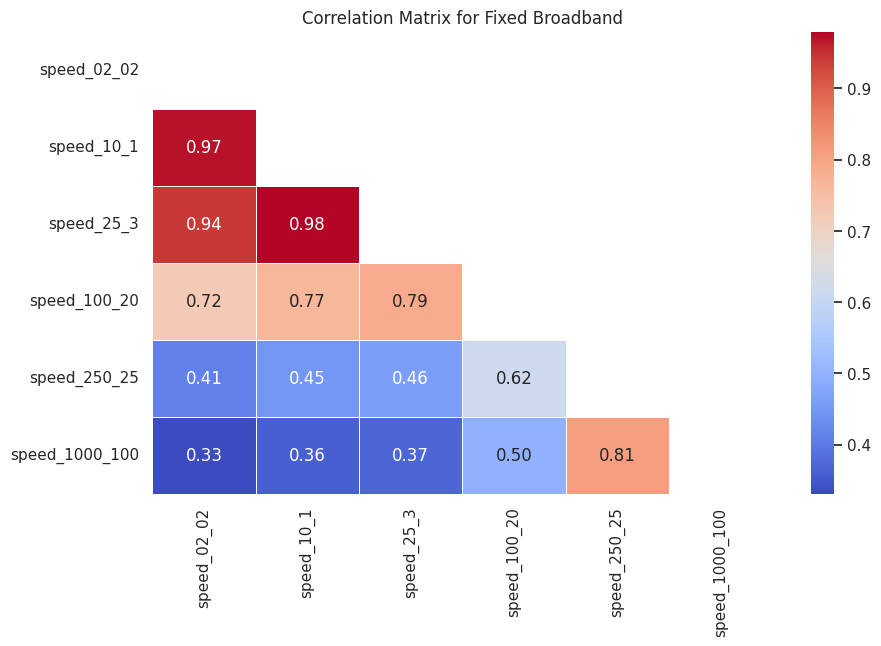

In [ ]:
# Create the plot
plt.figure(figsize=(10,6))
matrix = fixed_corr
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(fixed_corr,
           annot=True,
           linewidths=.5,
           cmap='coolwarm',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Matrix for Fixed Broadband')
plt.show()

#### Fixed Broadband Correlations:
* Positive Correlation:

  * ```'speed_10_1'``` and ```speed_02_02``` have a positive correlation which is indicated by a number close to 1.
  * The columns ```'speed25_3'``` and ```'speed_10_1'``` also have a positive correlation with a correlation of 0.98.

* Negative Correlation:

  * ```'speed_1000_100'``` has an almost negative correlation with ```'speed_02_02', 'speed_10_1',``` and ```'speed_25_3'``` because the values of correlation are close to 0.

In [ ]:
#Create a correlation matrix for the fixed broadband dataframe
mobile_corr = new_mobile_bb.select_dtypes(include='number').corr()

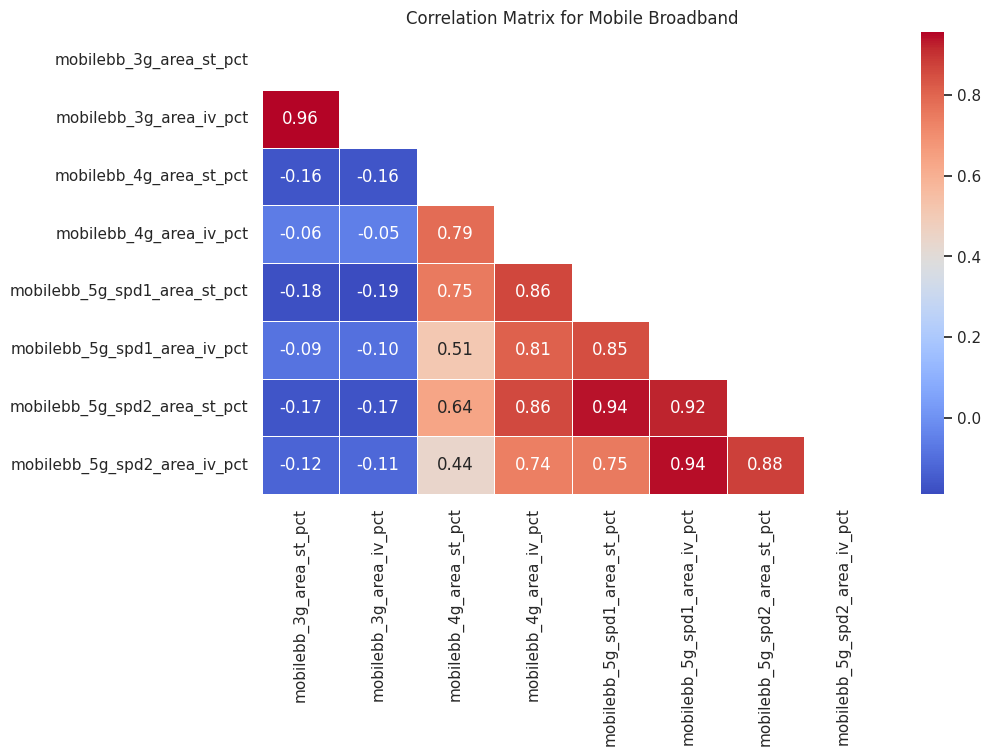

In [ ]:
# Create the plot
plt.figure(figsize=(10,6))
matrix = mobile_corr
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(mobile_corr,
           annot=True,
           linewidths=.5,
           cmap='coolwarm',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Matrix for Mobile Broadband')
plt.show()

#### Mobile Broadband Correlations:
* Positive Correlation:

  * ```'mobile_3g_area_iv_pct'``` has a positive correlation with both ```'mobile_3g_area_st_pct'``` and ```'mobile_3g_area_iv_pct'```.
  
  * ```'mobilebb_5g_spd2_area_st_pct'``` has a positive correlation with ```'mobilebb_5g_spd1_area_st_pct'```.
  * Lastly, ```'mobilebb_5g_spd2_area_iv_pct'``` has a positive correlation with ```'mobilebb_5g_spd1_area_iv_pct'```.
  
  These values are all close to 1, causing a positive correlation.

* Negative Correlation:

  * ```'mobilebb_4g_area_st_pct', 'mobilebb_4g_area_iv_pct','mobilebb_5g_spd1_area_st_pct', 'mobilebb_5g_spd1_area_iv_pct', 'mobilebb_5g_spd2_area_st_pct'``` and ```'mobilebb_5g_spd2_area_iv_pct'``` all have a negative correlation with both ```'mobile_3g_area_st_pct'``` and ```'mobile_3g_area_iv_pct'```.
  
  These values are all negative and under zero, causing a negative correlation.

### Visualizations
Let's visualize the data through plots.

First, let's create bar charts comparing the served and underserved amounts for both fixed and mobile broadbands.

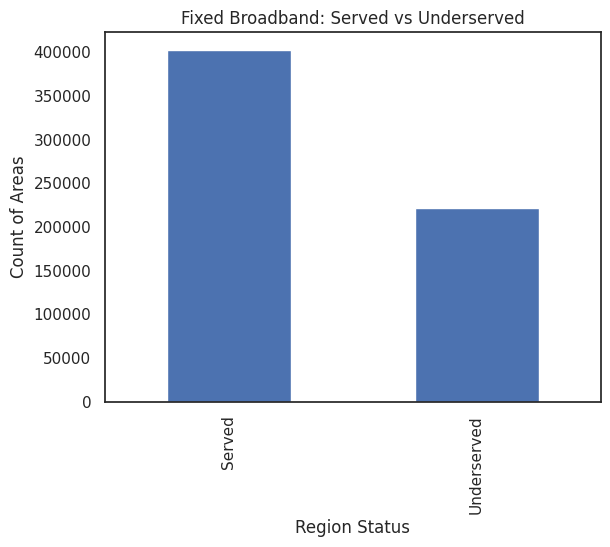

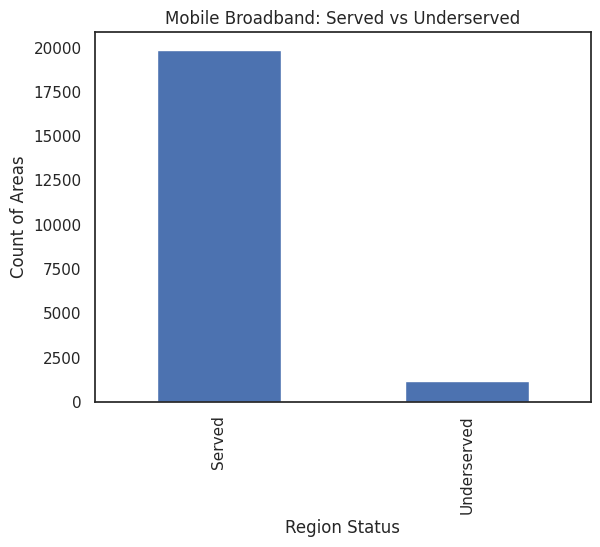

In [ ]:
# Visualization 1: Fixed broadband served vs underserved
fig, ax = plt.subplots()
new_fixed_bb['region_status'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Region Status')
ax.set_ylabel('Count of Areas')
ax.set_title('Fixed Broadband: Served vs Underserved')
plt.show()

# Visualization 2: Mobile broadband served vs underserved
fig, ax = plt.subplots()
new_mobile_bb['region_status'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Region Status')
ax.set_ylabel('Count of Areas')
ax.set_title('Mobile Broadband: Served vs Underserved')
plt.show()

#### Interpretations:

The first bar chart displays the number of areas classified as “Served” (where at least 50% of homes have access to good fixed broadband speeds) versus “Underserved” for fixed-line internet. The chart indicates a high count of “Served” areas, suggesting that fixed broadband has been deployed widely.

The second bar chart presents the same comparison—“Served” versus “Underserved”—but for 4G mobile coverage. The difference in bar heights highlights whether mobile broadband is effectively filling coverage gaps left by fixed networks, or whether it is also lacking, especially in rural or low-density areas.

Next, let's compare the distribution of 25/3 Mbps Coverage and 4g Coverage based on region status using box plots.

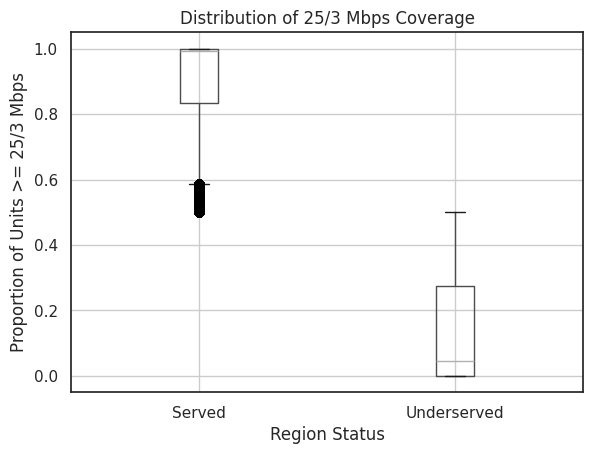

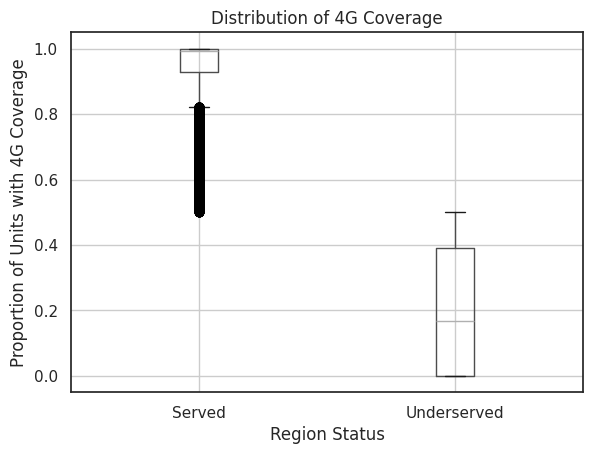

In [78]:
# Visualization 3: Distribution of 25/3 Mbps coverage by region status
fig, ax = plt.subplots()
new_fixed_bb.boxplot(column='speed_25_3', by='region_status', ax=ax)
ax.set_xlabel('Region Status')
ax.set_ylabel('Proportion of Units >= 25/3 Mbps')
ax.set_title('Distribution of 25/3 Mbps Coverage')
plt.suptitle('')
plt.show()

# Visualization 4: Distribution of 4G coverage by region status
fig, ax = plt.subplots()
new_mobile_bb.boxplot(column='mobilebb_4g_area_st_pct', by='region_status', ax=ax)
ax.set_xlabel('Region Status')
ax.set_ylabel('Proportion of Units with 4G Coverage')
ax.set_title('Distribution of 4G Coverage')
plt.suptitle('')
plt.show()

#### Interpretation:

The first boxplot shows the distribution of 25/3 Mbps coverage by region status. The narrow range of the “Served” category indicates consistently strong performance, while the wider spread in the “Underserved” category reflects a mix of situations—from nearly adequate coverage to very limited access. The clear gap between the two boxplots reinforces the relevance of the 50% cutoff: areas labeled “Served” not only meet this threshold but often exceed it substantially.

The second boxplot illustrates the distribution of 4G coverage across served and underserved regions. In this case, the "Served" areas show a higher concentration of coverage, with a tighter distribution of values, indicating more consistent and reliable 4G service. On the other hand, the "Underserved" category shows a broader spread of values, highlighting the disparities in 4G availability, with some regions lacking coverage entirely and others having partial coverage. This plot emphasizes that while some underserved areas may have access to partial 4G coverage, there is a significant gap in service quality and availability compared to served regions.

Let's create line plots to display what fixed broadband speeds look like in underserved and served regions.

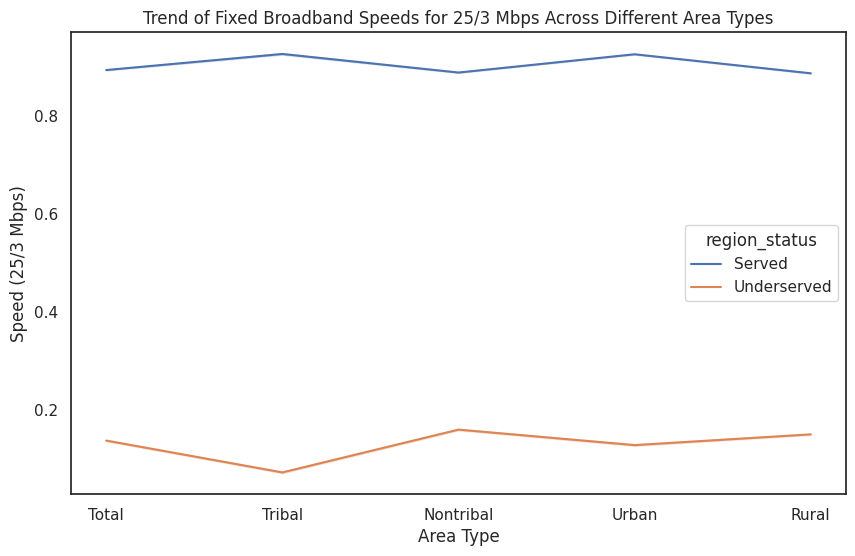

In [ ]:
# Line plot for broadband speeds across different area types
plt.figure(figsize=(10, 6))
sns.lineplot(data=new_fixed_bb, x='area_data_type', y='speed_25_3', hue='region_status')
plt.title('Trend of Fixed Broadband Speeds for 25/3 Mbps Across Different Area Types')
plt.xlabel('Area Type')
plt.ylabel('Speed (25/3 Mbps)')
plt.show()

Let's also create line plots to display what mobile broadband speeds look like in underserved and served regions.

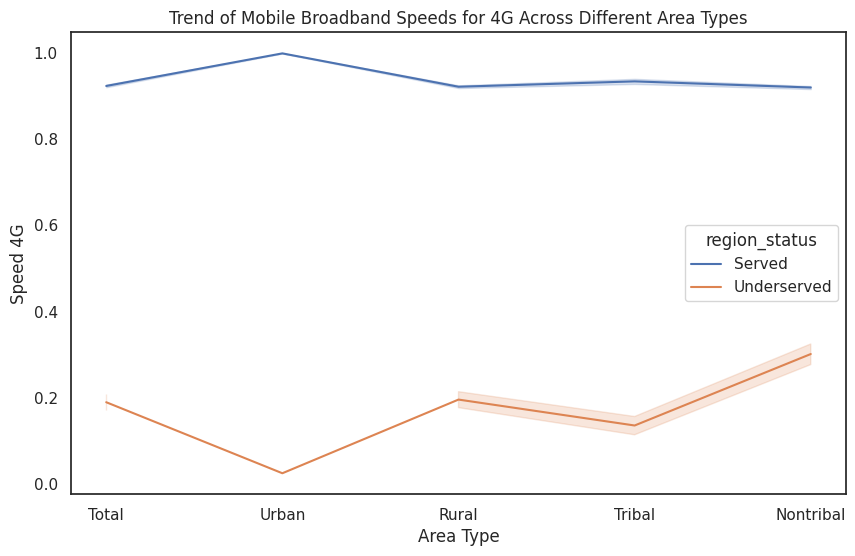

In [ ]:
# Line plot for broadband speeds across different area types
plt.figure(figsize=(10, 6))
sns.lineplot(data=new_mobile_bb, x='area_data_type', y='mobilebb_4g_area_st_pct', hue='region_status')
plt.title('Trend of Mobile Broadband Speeds for 4G Across Different Area Types')
plt.xlabel('Area Type')
plt.ylabel('Speed 4G')
plt.show()

#### Interpretation:

The line plots for fixed broadband speeds (25/3 Mbps) and mobile broadband speeds (4G) across different area types offer valuable insights into how broadband availability impacts underserved regions. The fixed broadband plot shows differences in speeds between served and underserved regions, revealing that urban areas tend to have better broadband speeds compared to rural areas, which often remain underserved. Similarly, the mobile broadband plot highlights the 4G coverage in served and underserved areas, with urban regions typically having greater 4G availability than rural ones. These visualizations effectively demonstrate the geographical disparities in broadband access, showcasing how the availability of broadband technologies like fixed broadband and mobile 4G influence speeds and access in underserved regions. By comparing these technologies and regions, the plots help answer the research question about how broadband availability affects speeds, especially in underserved areas, and emphasize the technological divide between urban and rural areas.

Now let's create a stack bar plot to visualize the mobile broadband coverage for different mobile broadband types.

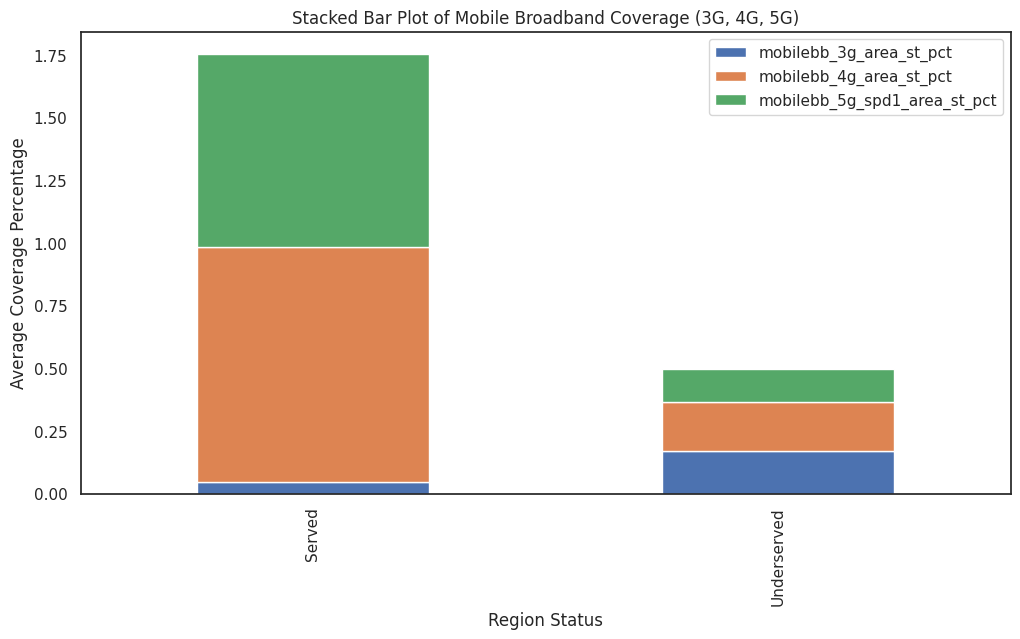

In [ ]:
# Stacked bar plot for mobile broadband coverage by region status
coverage_data = new_mobile_bb.groupby('region_status')[['mobilebb_3g_area_st_pct', 'mobilebb_4g_area_st_pct', 'mobilebb_5g_spd1_area_st_pct']].mean()

# Plot stacked bar chart
coverage_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Region Status')
plt.ylabel('Average Coverage Percentage')
plt.title('Stacked Bar Plot of Mobile Broadband Coverage (3G, 4G, 5G)')
plt.show()

#### Interpretation:

The stacked bar plot for mobile broadband coverage by region status effectively illustrates the average coverage of 3G, 4G, and 5G technologies in both served and underserved regions. Each bar represents the two region statuses ("Served" and "Underserved"), with the coverage for 3G, 4G, and 5G stacked on top of each other. The height of each segment within the bar represents the average percentage of coverage for each technology. This plot allows for an easy comparison of how the coverage for each technology varies between the two region statuses.

From the plot, it can be seen that served regions have higher and more balanced coverage across 3G, 4G, and 5G technologies. On the other hand, underserved regions have lower coverage across all mobile broadband technologies, especially 5G. This visualization directly supports the research question by clearly showing the broadband availability disparities between served and underserved areas, reinforcing the importance of improving coverage in underserved regions for equitable access to high-speed internet.

### Refining our Research Question

We dicussed the research question and were wondering how our analysis could become more specifc to certain regions that are likely to be underserved. We decided to continue filtering by county, specifically rural and tribal counties.



#### Refined Research Question:
How does the availability of both fixed and mobile broadband technologies affect broadband speeds in **rural and tribal county regions** of the U.S.?

This question is:

* Specific: Focuses specifically on rural and tribal county regions.

* Researchable: There is information on the broadband in rural and tribal areas as well as the speeds. This gives us information on how those specific correlate to the speeds of broadband.

* Feasible: This is a question based on social justice that uses the information provided for the rural and tribal regions on broadband acessibility.

* Interesting: This is interesting to us because it is important to think about how accesibilty impacts how well broadband technology works in areas seperated from modern society.


First let's filter the ```'area_data_type'``` by keeping only the ```'Rural',``` and ```'Tribal'``` types. Let's use the orginal dataframes, so we have access to the other columns we previously eliminated. Then, let's differentiate the ```'technology'``` column in the fixed broaband dataframe by keeping only the ```'Fiber',``` and ```'Cable'``` types. Next, let's inspect the value counts. This will show us the amount of each technology present in the fixed broadband dataframe. Now, we can create new datframes for the fixed and mobile broadbands using lists.  

In [ ]:
# Filter to Rural/Tribal County
keep_types = ['Rural','Tribal']
fixed_county = fixed_bb[
    fixed_bb['area_data_type'].isin(keep_types) &
    (fixed_bb['geography_type'] == 'County')
]
mobile_county = mobile_bb[
    mobile_bb['area_data_type'].isin(keep_types) &
    (mobile_bb['geography_type'] == 'County')
]

# Differentiate by fixed-technology (e.g., Fiber vs Cable)
fixed_fiber_cable = fixed_county[
    fixed_county['technology'].isin(['Fiber','Cable'])
].copy()
# We can inspect counts:
print("Fiber vs Cable counts:")
print(fixed_fiber_cable['technology'].value_counts(), "\n")

# Step 5: Zero in on key speed tiers
fixed_key = fixed_fiber_cable[[
    'geography_id','area_data_type','geography_desc',
    'technology','biz_res','total_units','speed_25_3'
]].copy()

mobile_key = mobile_county[[
    'geography_id','area_data_type','geography_desc',
    'mobilebb_5g_spd1_area_st_pct','mobilebb_5g_spd2_area_st_pct'
]].copy()

Fiber vs Cable counts:
technology
Cable    7406
Fiber    7406
Name: count, dtype: int64 



In [ ]:
#Let's take a look at our new fixed broadband dataframe
print("Fixed (25/3) sample:")
fixed_key.head()

Fixed (25/3) sample:


,geography_id,area_data_type,geography_desc,technology,biz_res,total_units,speed_25_3
188022,01031,Tribal,Coffee County,Cable,R,11748,0.415390
188023,01031,Tribal,Coffee County,Cable,B,11748,0.160878
188024,01031,Tribal,Coffee County,Fiber,R,11748,0.853507
188025,01031,Tribal,Coffee County,Fiber,B,11748,0.846612
188052,01039,Tribal,Covington County,Cable,R,576,0.555556


In [ ]:
#Let's take a look at our new mobile broadband dataframe
print("Mobile (5G speed tiers) sample:")
mobile_key.head()

Mobile (5G speed tiers) sample:


,geography_id,area_data_type,geography_desc,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd2_area_st_pct
9311,01001,Rural,"Autauga County, AL",0.840584,0.592987
9312,01003,Rural,"Baldwin County, AL",0.694074,0.541922
9313,01005,Rural,"Barbour County, AL",0.448568,0.295989
9314,01007,Rural,"Bibb County, AL",0.472314,0.285973
9315,01009,Rural,"Blount County, AL",0.939835,0.669831


Now that we have new dataframes, we can look at the details of each dataframe using the ```.describe()``` method.

In [ ]:
# Let's take a look at the different statistics of the new fixed broadband dataframe
fixed_county.describe()

,total_units,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100
count,111090.000000,111090.000000,111090.000000,111090.000000,111090.000000,111090.000000,111090.000000
mean,10959.213881,0.648614,0.619469,0.599389,0.473957,0.262736,0.168107
std,11949.267557,0.377672,0.383427,0.391718,0.411493,0.344658,0.282287
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3538.000000,0.320170,0.259542,0.201888,0.004192,0.000000,0.000000
50%,7872.000000,0.804565,0.746903,0.709370,0.434139,0.000157,0.000000
75%,14962.000000,1.000000,1.000000,1.000000,0.953035,0.549137,0.255587
max,335827.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Fixed County Statistics
***This data seems to be very similar to the dataframes created and utilized previously.*** The ```'speed_02_02', 'speed_10_1', 'speed_25_3',``` and ```speed_100_20'``` columns have a regular distribution because their means and medians(50%) are very close by. The last two columns have means and medians farther apart, however the means are the not more or less than 1 std than the medians. This indicates a regular distribution for these two columns as well. The mins and maxs are close to the first(25%) and third quartile(75%) respectively, meaning than no outliers are not present.

In [ ]:
# Let's take a look at the different statistics of the new mobile broadband dataframe
mobile_county.describe()

,total_area,mobilebb_3g_area_st_pct,mobilebb_3g_area_iv_pct,mobilebb_4g_area_st_pct,mobilebb_4g_area_iv_pct,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd1_area_iv_pct,mobilebb_5g_spd2_area_st_pct,mobilebb_5g_spd2_area_iv_pct
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,2656.868095,0.044833,0.029452,0.888394,0.626878,0.675618,0.370737,0.524455,0.252589
std,9292.731723,0.164883,0.119334,0.187178,0.242417,0.259553,0.246375,0.256160,0.208575
min,0.105332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,919.552725,0.000000,0.000000,0.866311,0.459260,0.500000,0.174603,0.329712,0.100164
50%,1469.915037,0.000000,0.000000,0.976649,0.644665,0.723014,0.331125,0.523138,0.197783
75%,2219.987770,0.000000,0.000000,0.998332,0.825496,0.900467,0.532500,0.725667,0.354133
max,396170.700380,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Mobile County Statistics
***This data seems to be very similar to the dataframes created and utilized previously.*** The columns in this dataframe have means and medians(50%) very close to each other, indicating a normal distribution for each column. The mins for the ```'mobile_4g_area_st_pct', 'mobilebb_4g_area_iv_pct', 'mobilebb_5g_spd1_area_st_pct'``` and ```'mobilebb_5g_spd2_area_st_pct'``` are far from the first quartile(25%) which means there are lower outliers. Also the maxs of ```'mobilebb_3g_area_st_pct',	'mobilebb_3g_area_iv_pct, 'mobilebb_5g_spd1_area_iv_pct',``` and ```'mobilebb_5g_spd2_area_iv_pct'``` are far apart from the  third quartile(75%) which means those columns have higher outliers.

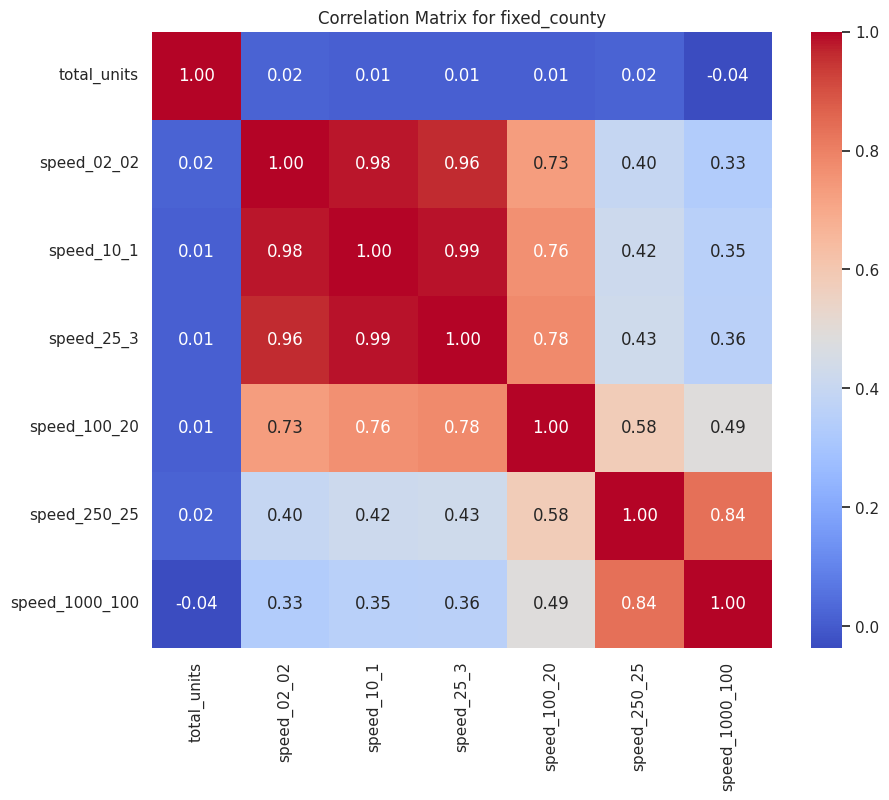

In [ ]:
fixed_county_corr = fixed_county.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(fixed_county_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for fixed_county')
plt.show()

#### Fixed County Correlations:
* Positive Correlation:

  * ```'speed_02_02', 'speed_10_1,``` and ```'speed_25_3''``` have a positive correlation with each other because the values are vey close to 1.

* Negative Correlation:

  * ```'speed_1000_100'``` has a negative correlation with ```'total_units'``` and vice versa because the values of correlation are under 0.

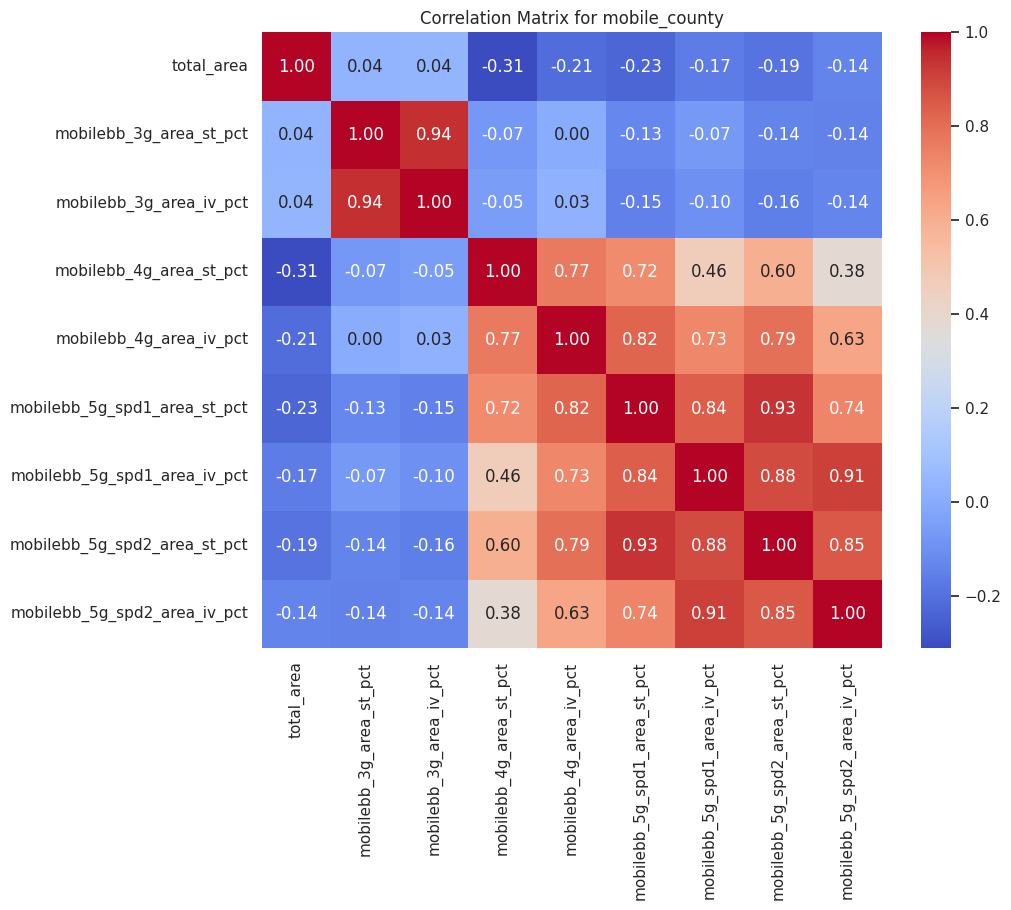

In [ ]:
mobile_county_corr = mobile_county.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(mobile_county_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for mobile_county')
plt.show()

#### Mobile Broadband Correlations:
* Positive Correlation:

  * ```'mobile_5g_spd1_area_st_pct'``` has a positive correlation with ```'mobile_5g_spd2_area_st_pct'```.
  
  * ```'mobile_5g_spd1_area_iv_pct'``` has a positive correlation with ```'mobile_5g_spd2_area_iv_pct'```.
  
  These values are all close to 1, causing a positive correlation.

* Negative Correlation:

  * ```'total_area',``` has a negative correlation with ```'mobilebb_4g_area_st_pct', 'mobilebb_4g_area_iv_pct', 'mobilebb_5g_spd1_area_st_pct', 'mobilebb_5g_spd1_area_iv_pct', 'mobilebb_5g_spd2_area_st_pct',``` and ```'mobilebb_5g_spd2_area_iv_pct'``` and vice versa.

  * ```'mobilebb_3g_area_st_pct',``` has a negative correlation with ```'mobilebb_4g_area_st_pct', 'mobilebb_5g_spd1_area_st_pct', 'mobilebb_5g_spd1_area_iv_pct', 'mobilebb_5g_spd2_area_st_pct', ``` and ```'mobilebb_5g_spd2_area_iv_pct'``` and vice versa.
  
  * ```'mobilebb_3g_area_iv_pct',``` also has a negative correlation with ```'mobilebb_4g_area_st_pct', 'mobilebb_5g_spd1_area_st_pct', 'mobilebb_5g_spd1_area_iv_pct', 'mobilebb_5g_spd2_area_st_pct', ``` and ```'mobilebb_5g_spd2_area_iv_pct'``` and vice versa.
  
  These values are all negative and under zero, causing a negative correlation.

### More Visualizations

Now that we have finished filtering the data to fit our refined research question, let's visualize it through plots.

First, let's compare the average 25/3 Mbps Coverage by different technologies used in the fixed broadband, specifically Cable and Fiber, using bar graphs.

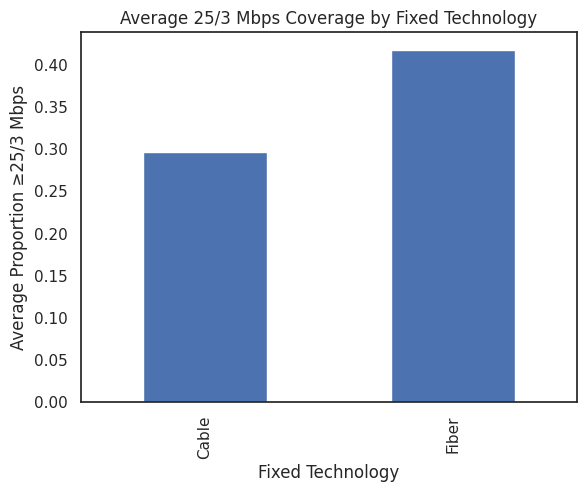

In [ ]:
# 1. Bar chart: mean speed_25_3 by fixed technology
mean_speeds = fixed_key.groupby('technology')['speed_25_3'].mean()
fig, ax = plt.subplots()
mean_speeds.plot(kind='bar', ax=ax)
ax.set_xlabel('Fixed Technology')
ax.set_ylabel('Average Proportion ≥25/3 Mbps')
ax.set_title('Average 25/3 Mbps Coverage by Fixed Technology')
plt.show()

#### Interpretation:

This bar chart shown above shows the average fraction of addressable units with ≥ 25 Mbps down/3 Mbps up.

Based on the plot, we can see that Fiber generally delivers a higher average coverage than Cable in these rural/tribal counties, indicating that where fiber is available, it almost always meets the FCC’s broadband threshold. On the other hand, Cable has a lower average proportion, suggesting that cable deployments in these areas are less uniformly built out to 25/3.

Let's also look at the coverage distribution of two of the 5g tiers through box plots.

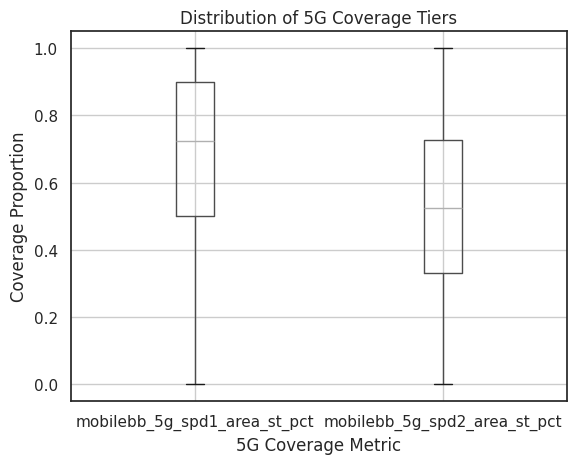

In [ ]:
# 3. Boxplots: mobile 5G tier coverage
plt.figure()
mobile_key[['mobilebb_5g_spd1_area_st_pct', 'mobilebb_5g_spd2_area_st_pct']].boxplot()
plt.xlabel('5G Coverage Metric')
plt.ylabel('Coverage Proportion')
plt.title('Distribution of 5G Coverage Tiers')
plt.show()

#### Interpretation:

The boxplots shown above shows the mobile 5G Tier 1 vs Tier 2 coverage, which Tier 1 (≥ 7 Mbps/1 Mbps) and Tier 2 (≥ 35 Mbps/3 Mbps)

Based on the boxplots, we can see that Tier 1 has a higher median and tighter spread. Most rural/tribal areas already have basic 5G coverage sufficient for light browsing. On the other hand, Tier 2, which is more demanding, has a lower median and wider IQR. This reflects the fact that many places lack high-performance 5G.

Lastly, let's take another comparitive look at 5g Tier Coverage using a Scatter Plot.

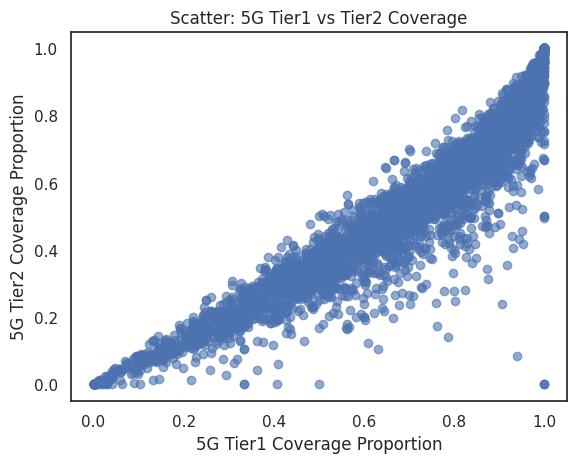

In [ ]:
# 4. Scatter: 5G tier1 vs tier2
plt.figure()
plt.scatter(
    mobile_key['mobilebb_5g_spd1_area_st_pct'],
    mobile_key['mobilebb_5g_spd2_area_st_pct'],
    alpha=0.6
)
plt.xlabel('5G Tier1 Coverage Proportion')
plt.ylabel('5G Tier2 Coverage Proportion')
plt.title('Scatter: 5G Tier1 vs Tier2 Coverage')
plt.show()

#### Interpretation:

The Scatter plot shown above shows the mobile 5G Tier 1 vs Tier 2 coverage. Each point represents a county.

Based on the plot, we can see that there is a strong positive correlation, which means that counties that invest in basic 5G often upgrade to higher speeds as well. However, we can notice the cluster of points with high x, low y. Those have broad access to minimal 5G but little high-speed 5G. Therefore, simply having 5G may not guarantee premium performance.
